# Project Scratchwork

**Notes:**

Added two columns at the end that are the games played and won for the player in the following season

Filtered data so that each row has at least one game started in the current season and the following season

Exported to "filtered_data.csv"

In [44]:
import numpy as np
import pandas as pd

In [45]:
df = pd.read_excel("data.xlsx",header=1)

In [46]:
df.head()

,Player,Year,Age,Draft,Tm,AV,Ht,Wt,BMI,G,...,XP%,FGM,FGA,FG%,2PM,Sfty,Pts,Yrs,PB,AP1
0,A.J. Feeley\FeelA.00,2001,24,5-155,PHI,0,6-3,220.0,27.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
1,A.J. Feeley\FeelA.00,2002,25,5-155,PHI,3,6-3,220.0,27.5,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
2,A.J. Feeley\FeelA.00,2004,27,5-155,MIA,1,6-3,220.0,27.5,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6,1,0,0
3,A.J. Feeley\FeelA.00,2006,29,5-155,PHI,1,6-3,220.0,27.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
4,A.J. Feeley\FeelA.00,2007,30,5-155,PHI,2,6-3,220.0,27.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0


In [62]:
df2 = df[df["Att"] > 30]

In [51]:
vals = df2["Player"].value_counts()
vals2 = vals[vals > 4]
len(vals2)

148

(array([191., 133., 135.,  94.,  94.,  84.,  72.,  69.,  65.,  84.,  59.,
         77.,  71.,  77.,  91., 112.,  90.,  80.,  64.,  45.,  24.,   9.,
          6.,   1.]),
 array([ 31.,  60.,  89., 118., 147., 176., 205., 234., 263., 292., 321.,
        350., 379., 408., 437., 466., 495., 524., 553., 582., 611., 640.,
        669., 698., 727.]),
 <a list of 24 Patch objects>)

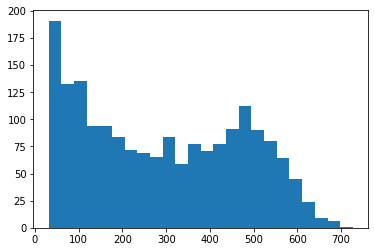

In [63]:
fig,ax = plt.subplots()
ax.hist(df2["Att"],bins=24)

(1847, 51)


(array([201., 144., 142.,  92.,  96.,  79.,  75.,  82.,  63.,  60.,  73.,
         71.,  86.,  85., 498.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16.]),
 <a list of 15 Patch objects>)

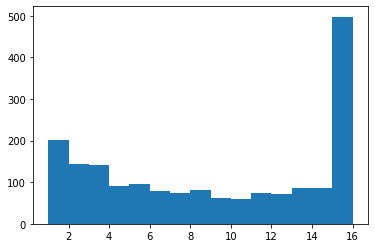

In [80]:
fig,ax = plt.subplots()
df4 = df[df["GS"]>=1]
print(df4.shape)
ax.hist(df4["GS"],bins=15)

(array([531., 353., 283., 251., 182., 131.,  60.,  26.,   5.,   5.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

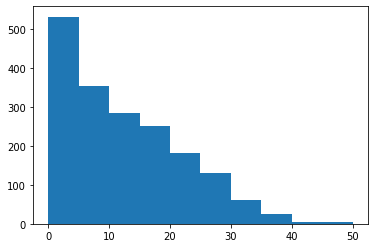

In [65]:
fig, ax = plt.subplots()
ax.hist(df2["TD"])

In [111]:
for i in range(df.shape[0]):
    year = df.loc[i,"Year"]
    nextYear = np.where((df["Year"]==(year+1)) & (df["Player"]==df.loc[i,"Player"]))
    if len(nextYear[0]) > 0:
        df.loc[i,"nextYearWins"] = df.loc[nextYear[0][0],"W"]
        df.loc[i,"nextYearGames"] = df.loc[nextYear[0][0],"GS"]

In [112]:
df.head()

,Player,Year,Age,Draft,Tm,AV,Ht,Wt,BMI,G,...,FG%,2PM,Sfty,Pts,Yrs,PB,AP1,nextYear,nextYearWins,nextYearGames
0,A.J. Feeley\FeelA.00,2001,24,5-155,PHI,0,6-3,220.0,27.5,1.0,...,NaN,NaN,NaN,0,1,0,0,4.0,4.0,5.0
1,A.J. Feeley\FeelA.00,2002,25,5-155,PHI,3,6-3,220.0,27.5,6.0,...,NaN,NaN,NaN,0,1,0,0,0.0,NaN,NaN
2,A.J. Feeley\FeelA.00,2004,27,5-155,MIA,1,6-3,220.0,27.5,11.0,...,NaN,NaN,NaN,6,1,0,0,0.0,NaN,NaN
3,A.J. Feeley\FeelA.00,2006,29,5-155,PHI,1,6-3,220.0,27.5,2.0,...,NaN,NaN,NaN,0,1,0,0,0.0,0.0,2.0
4,A.J. Feeley\FeelA.00,2007,30,5-155,PHI,2,6-3,220.0,27.5,3.0,...,NaN,NaN,NaN,0,1,0,0,0.0,NaN,NaN


(array([335., 174.,  62., 117.,  59., 104., 106.,  59., 142., 442.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

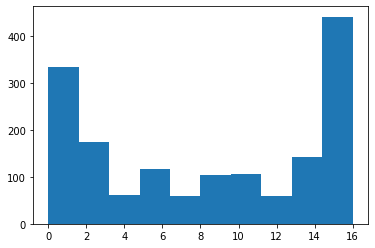

In [113]:
fig,ax = plt.subplots()
ax.hist(df["nextYearGames"])

In [118]:
df5 = df[(df["nextYearGames"]>0) & (df["GS"]>0)]
df5.shape

(1212, 54)

In [117]:
len(df5["Player"].unique())

266

In [120]:
df5.to_csv("filtered_data1.csv")